In [1]:
import yfinance as yf
data = yf.download("NANC", start="2023-07-28")
print(data["Close"].iloc[0])

[*********************100%***********************]  1 of 1 completed

28.77899932861328


In [117]:
nanc_20230728 = 28.78	
nanc_end = 35.23
nanc_return = (nanc_end-nanc_20230728)/nanc_20230728
nanc_return

0.22411396803335634

In [118]:
import pandas as pd
predictions = pd.read_csv('./predictions/nancy_predictions_varlingam_lag_1.csv', delimiter=',', index_col=False, header=0)
backtest_returns = pd.read_csv('./backtesting/nancy_backtest_returns_varlingam_lag_6.csv', delimiter=',', index_col=False, header=0)

In [119]:
winner_num = backtest_returns.iloc[:,0].tolist()
ar = backtest_returns.iloc[:,1].tolist()
ar_self = backtest_returns.iloc[:,2].tolist()
baseline_annualized_return = (1+nanc_return)**(252/predictions.shape[0])-1
ar_baseline = [baseline_annualized_return]*len(winner_num)

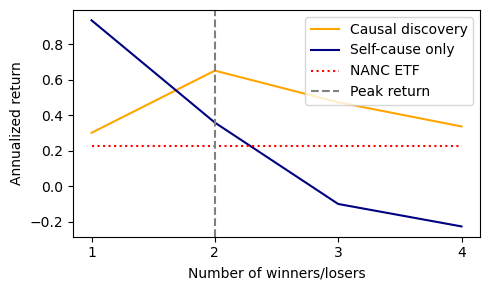

In [120]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,3))
plt.plot(winner_num, ar, label = 'Causal discovery', color = 'orange')
plt.plot(winner_num, ar_self, label = 'Self-cause only', color = 'navy')
plt.plot(winner_num, ar_baseline, label = 'NANC ETF', color = 'red', linestyle=':')
peak_index = np.argmax(ar)
peak_x = int(winner_num[peak_index])
peak_y = round(ar[peak_index],2)
plt.axvline(x=peak_x, color='gray', linestyle='--', label=f'Peak return')
# plt.text(peak_x, peak_y, f'({peak_x}, {peak_y})', fontsize=12, ha='left', va='baseline')
plt.xlabel('Number of winners/losers')
plt.ylabel('Annualized return')
plt.xticks(winner_num)
plt.legend()
plt.tight_layout()
plt.savefig('./plots/nancy_portfolio_performance_plot_varlingam_lag_6.pdf')